***Estimating pi***

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def unitcircle(x):
    r = 1
    return np.nan_to_num(np.sqrt(r**2 - x**2))

def gradient_unitcircle(x):
    r = 1
    return x/(r**2 - x**2)


n = 10000
d = 2

**1 Simple Monte Carlo where we estimate the expectation of f(x)**

[ 0.44280582  0.903431   -0.37197231 ... -0.29909913 -0.18398813
 -0.041622  ]


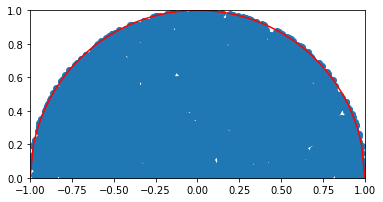

pi_est =  3.1416 | pi_true =  3.141592653589793 | abs_diff =  7.346410206832132e-06 | rel_err =  0.00023384349967961742 %


In [5]:
rnd_points = np.random.uniform(low=-1,high=1,size=(n,d))
x = rnd_points[:,0]
y = np.abs(rnd_points[:,1])
y_circle = unitcircle(x)

print(x)

# indicator function I(X) tells whether or not the random y is within the circle
indicator = (y_circle > y)

pi_est = 4 * np.nansum((indicator)*1)/n

grid = np.linspace(-1, 1, num=100)
plt.plot(grid, unitcircle(grid), "-r")
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.scatter(x[indicator], y[indicator])
plt.show()
print("pi_est = ", pi_est, "| pi_true = ", np.pi, "| abs_diff = ", np.abs(pi_est - np.pi), "| rel_err = ", 100*np.abs(pi_est - np.pi)/np.pi, "%")
# print(rnd_points)
# print(x)
# print(y)

**2 Importance "Sampling" (-> Approximation)**

(100000, 1)
[[0.         0.93925461 0.72331835 ... 0.         0.96973343 0.82507296]]
[[0.65275906]
 [0.22115168]
 [0.26463558]
 ...
 [1.33091205]
 [0.21481065]
 [0.24458814]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


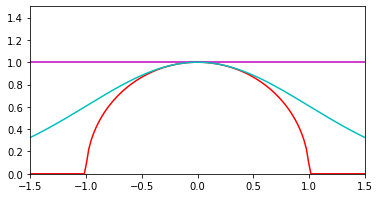

pi_est =  [[0.13122771]] | pi_true =  3.141592653589793 | abs_diff =  [[3.01036494]] | rel_err =  [[95.82289216]] %


In [ ]:
# unormalized gaussian q(x)
def q(x, mu, sigma):
    return np.exp(((x - mu)**2)/(-2*sigma**2))

n = 100000
mu = 0
sigma = 1  
d = 1
x = np.random.normal(mu, sigma, (n, d))
print(x.shape)

y_circle = unitcircle(x)
# unormalized uniform p(x) = 1 -> Importance weights W = p(x)/q(x) = 1/q(x)
W = 1/q(x, mu, sigma)
# normalizing Importance weights W
W = W/(np.sum(W))
print(y_circle.T)
print(W)
# TO-DO: Something goes wrong here
pi_est = np.dot(y_circle.T, W)
# indicator = y_circle > y


# pi_est = 4 * np.nansum((indicator)*1)/n

grid = np.linspace(-1, 1, num=100)
grid2 = np.linspace(-2, 2, num=200)


plt.plot(grid2, unitcircle(grid2), "-r")
plt.plot(grid2, np.ones(grid2.shape), "-m")
plt.plot(grid2, q(grid2, mu, sigma), "-c")
plt.xlim(-1.5, 1.5)
plt.ylim(0, 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

# plt.scatter(x[indicator], y[indicator])
plt.show()
print("pi_est = ", pi_est, "| pi_true = ", np.pi, "| abs_diff = ", np.abs(pi_est - np.pi), "| rel_err = ", 100*np.abs(pi_est - np.pi)/np.pi, "%")


***4 Markov Chain Monte Carlo - Metropolis (Gaussian Q(x))***

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


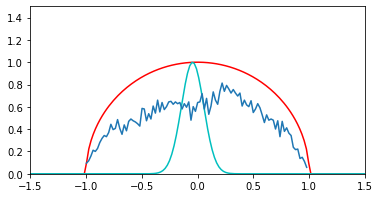

pi_est =  3.2656440145780623 | pi_true =  3.141592653589793 | abs_diff =  0.12405136098826919 | rel_err =  3.9486774597120298 %


In [7]:
def q(x, mu, sigma):
    return np.exp(((x - mu)**2)/(-2*sigma**2))#/(2*np.pi*sigma**2)

# here we are assuming that the circle is the the target distribution instead of being the target function like before

N = 10000
x_old = np.random.normal(0, 0.5)
sigma = 1/10 # How to choose sigma if distribution p(x) unknown
d = 1
x_samples_list = []
for n in range(N):
    x_new = np.random.normal(x_old, sigma)
    a = unitcircle(x_new)/unitcircle(x_old)
    if (a >= 1) or (a >= np.random.uniform(0, 1)):
        x_samples_list.append(x_new)
        x_old = x_new

x_samples = np.array(x_samples_list)

pi_est = 4 * np.nansum(unitcircle(x_samples))/N
hist_y, hist_x = np.histogram(x_samples, bins=N//100, density=True)
# print(hist_y, hist_x)
grid2 = np.linspace(-2, 2, num=200)
plt.plot(grid2, unitcircle(grid2), "-r")
plt.plot(grid2, q(grid2, np.random.normal(0, 0.5), sigma), "-c")
plt.xlim(-1.5, 1.5)
plt.ylim(0, 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
# plt.hist(x_samples, density=True, bins=50)
plt.plot(hist_x[:-1], hist_y)
# plt.scatter(x[indicator], y[indicator])
plt.show()
print("pi_est = ", pi_est, "| pi_true = ", np.pi, "| abs_diff = ", np.abs(pi_est - np.pi), "| rel_err = ", 100*np.abs(pi_est - np.pi)/np.pi, "%")